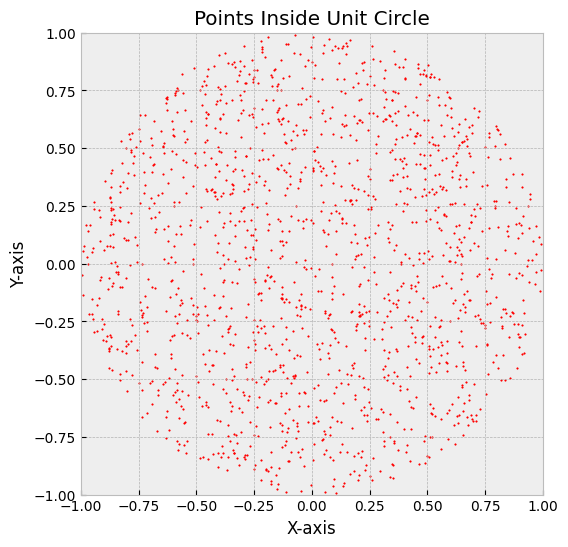

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

N=2000
inside = []
for _ in range(N):
    x, y = np.random.uniform(-1, 1, 2) #¿Qué significa (1,1,2) aquí? -- Genera dos números aleatorios entre -1 y 1
    if np.sqrt(x**2 + y**2) <= 1:
        inside.append((x, y))

plt.figure(figsize=(6,6))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], color='red', s=1, label='Points Inside Circle')
#circle = plt.Circle((0, 0), 1, color='blue', fill=False)
#plt.gca().add_artist(circle)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Points Inside Unit Circle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

After 10000 samples, π ≈ 3.1604
After 20000 samples, π ≈ 3.1464
After 30000 samples, π ≈ 3.1386666666666665
After 40000 samples, π ≈ 3.1458
After 50000 samples, π ≈ 3.14472
After 60000 samples, π ≈ 3.1442666666666668
After 70000 samples, π ≈ 3.143485714285714
After 80000 samples, π ≈ 3.14335
After 90000 samples, π ≈ 3.1436
After 100000 samples, π ≈ 3.14464


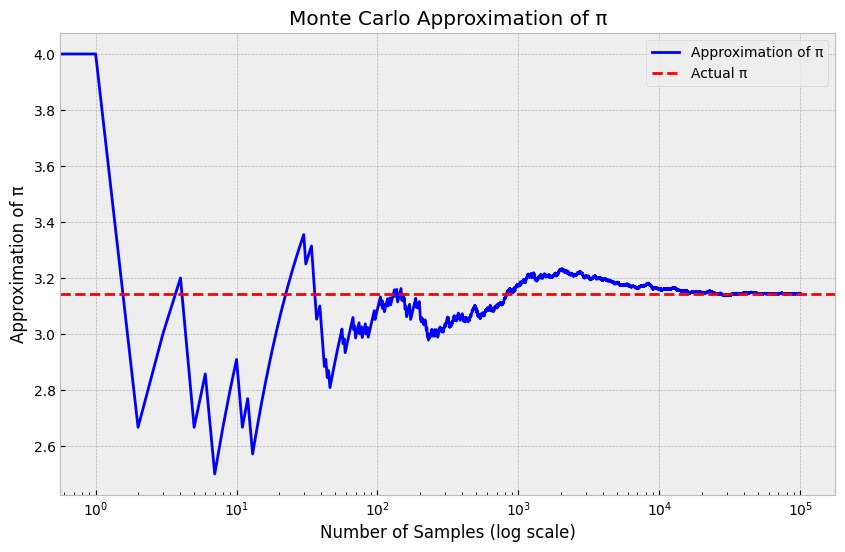

In [22]:
import numpy as np
import matplotlib.pyplot as plt

N=100000
inside = 0
approximation = np.empty(N)
for i in range(N):
    x, y = np.random.uniform(-1, 1, 2)
    if np.sqrt(x**2 + y**2) <= 1:
        inside += 1
    approximation[i] = (inside / (i + 1)) * 4
    if (i+1) % 10000 == 0:
        print(f"After {i+1} samples, π ≈ {approximation[i]}")
plt.figure(figsize=(10, 6))
plt.semilogx(approximation, label='Approximation of π', color='blue')
plt.axhline(y=np.pi, color='red', linestyle='--', label='Actual π')
plt.title('Monte Carlo Approximation of π')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Approximation of π')
plt.legend()
plt.grid(True)
plt.show()

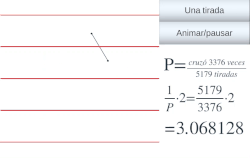

### Experimento de la Aguja de Buffon

El experimento de la aguja de Buffon es un problema clásico de probabilidad geométrica que puede ser utilizado para estimar el valor de π. A continuación, se muestra un GIF ilustrativo del experimento:

![Buffon's Needle GIF](https://upload.wikimedia.org/wikipedia/commons/1/1c/Buffon_needle_simulation.gif)

Referencia: [Wikipedia - Buffon's Needle Problem](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem)

$$P=\frac{1}{d/2}\frac{1}{\pi/2}\int_{0}^{\pi/2}\int_{0}^{\frac{\ell}{2}\cos{\theta}} dz d\theta$$
$$P=\frac{4}{d\pi}\int_{0}^{\pi/2}\frac{\ell}{2}\cos{\theta} \,d\theta$$
$$P=\frac{2\ell}{d\pi}\left[\sin{\theta}\right]_{0}^{\pi/2}=\frac{2\ell}{d\pi}(1-0)$$
$$P=\frac{C}{N}=\frac{2\ell}{d\pi} \Rightarrow \pi_{\text{emp}}=\frac{2\ell N}{dC}$$

In [206]:
#La aguja de Buffon
#Referencia: https://en.wikipedia.org/wiki/Buffon%27s_needle_problem
import numpy as np
import matplotlib.pyplot as plt

#Estilo de gráfico
plt.style.use('bmh')

d=1.0  # Distancia entre líneas
L=1.0  # Longitud de la aguja
N=500000  # Número de agujas

x_0 = np.random.uniform(0, L/2, N)                  # Posición del centro de la aguja
theta = np.random.uniform(0, np.pi/2, N)            # Ángulo de la aguja
corte = x_0 <= (L/2) * np.sin(theta)                # Condición de cruce

C = np.cumsum(corte)                                # Conteo acumulativo de cruces
########piEstimado = (2 * L * np.arange(1, N+1)) / (d * C)  # Estimación de π (Error de división por cero)
#¿Cómo evitar división entre cero? -- Usar np.arange(1, N+1) en lugar de np.arange(N) para evitar dividir por cero en la primera iteración
piEstimado = (2 * L * np.arange(1, N+1)) / (d * C + 1e-10)  # Estimación de π con corrección para evitar división por cero
errAbsoluto = np.abs(np.pi - piEstimado)            # Error absoluto
print(f"pi = {np.pi}")
print(f"Estimación de π después de {N} agujas: {piEstimado[-1]}")

pi = 3.141592653589793
Estimación de π después de 500000 agujas: 3.1429936385808745


#Gráfica del historial de valores de pi con Buffon

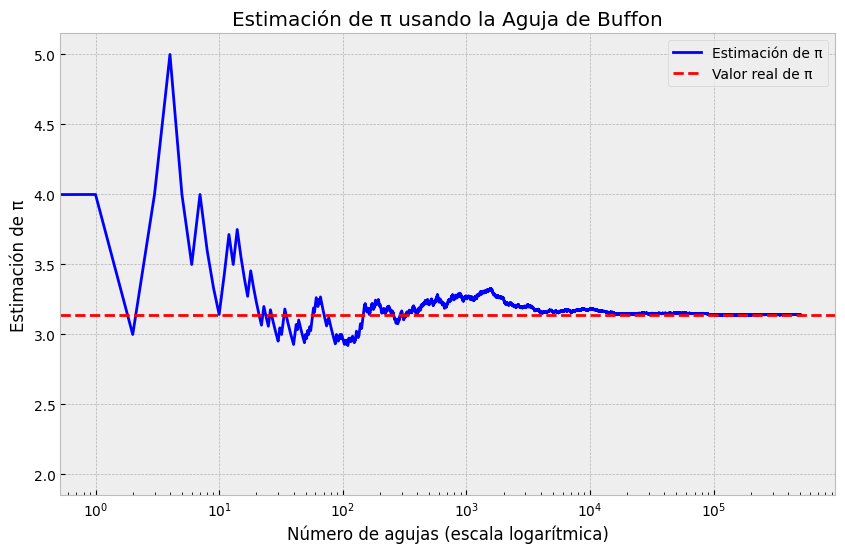

In [207]:
plt.figure(figsize=(10, 6))
plt.semilogx(piEstimado, label='Estimación de π', color='blue')
plt.axhline(y=np.pi, color='red', linestyle='--', label='Valor real de π')
plt.title('Estimación de π usando la Aguja de Buffon')
plt.xlabel('Número de agujas (escala logarítmica)')
plt.ylabel('Estimación de π')
plt.legend()
plt.grid(True)
plt.show()

### Cálculo aproximado de π por el área bajo la curva de un semicírculo

El valor de π puede ser aproximado calculando el área de un círculo de radio L. La ecuación de un semicírculo en el plano cartesiano es:

$$
y = \sqrt{1 - x^2}, \quad \text{para } x \in [0, 1L]
$$

El área del círculo completo es:

$$
\text{Área del círculo} = \pi L^2
$$

$$
A = \int_0^L f(x) \, dx \approx \sum_{i=0}^{n-1} f_i \Delta x
$$

donde $ \Delta x = \frac{L}{n} $.

$$
A=\frac{L}{N}\sum_{i=0}^{N-1} f_i
$$

$$
\sum_{i=0}^{N-1} f_i = \~{f}
$$

$$
A = \frac{L}{N} \~{f}
$$

Dado que el área del círculo es $ \pi L^2 $, podemos despejar π:
$$
\pi L^2 = 2A \implies \pi = \frac{2A}{L^2}
$$

Sustituyendo el valor de A en la ecuación de π, obtenemos:
$$
\pi \approx \frac{2}{L^2} \cdot \frac{L}{N} \~{f} = \frac{2 \~{f}}{N L}
$$

Por lo tanto, la aproximación de π utilizando el área bajo la curva del semicírculo es:

$$
\pi \approx \frac{2 \~{f}}{N L}
$$

donde $ \~{f} $ es la suma de las alturas de las barras (valores de la función) y N es el número de barras utilizadas en la aproximación.

Este método proporciona una forma sencilla de aproximar el valor de π mediante la integración numérica del área bajo la curva de un semicírculo.